# Textmining and Topic Modelling

A social news website by the name Hacker News (https://news.ycombinator.com/news) was used for this activity.

## Tasks Performed
1. Most recent 500 articles were extracted from the new site using web scraping and put into a data frame.
    * **title** - Title of the post
    * **date_created** - date and time the post was created
    * **user_name** - name of the account that made the post
    * **link_title** - url of the post
    * **domain** - domain like github.com, medium.com etc
    * **up_points** - number of upvotes the post received
    * **comment_number** - number of comments the post received
    
Extraction was performed using **BeautifulSoup**. Exception handling was also done in case there were any missing values. Once the data was extracted, the dataframe was converted to a csv file to avoid making continuous requests.

2. For each url of the post the body of the paragraph was extracted.
>A function was written to go to each of the links and extract the paragraph tags from the webpage. Along with requests **header** was also passed to avoid **403 error**.

3. Topic modelling was performed.
    * **SVD** was performed on the **document term matrix.**
    * On the SVD transformed matrix **Kmeans clustering** was performed to obtain the number of topics.
    * Each cluster was names based on the understanding.
    * Five Articles in each of the cluster were displayed.

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
import requests

In [3]:
def extract_html(source):
    title = []
    domain = []
    title_link = []
    soup = BeautifulSoup(source, 'html.parser')
    for link in soup.find_all('td', class_ = 'title')[1::2]:
        #title of the article
        title.append(link.a.text)
        try:
            #domain of the article if it exists
            domain.append(link.span.text.replace('(','').replace(')','').strip())
        except:
            #appending with missing if does not exist
            domain.append('Missing')
        try:
            #getting the links of the articles
            title_link.append(link.a['href'])
        except:
            #appending with missing 
            title_link.append('Missing')
    points = []
    user_id = []
    time = []
    comments_number = []
    for link in soup.find_all('td', class_ = 'subtext'):
        try:
            #points
            points.append(link.span.text)
        except:
            #if up points do not exist append with missing
            points.append('Missing')
        try:
            #user_id
            user_id.append(link.a.text)
        except:
            #append with missing
            user_id.append('Missing')
        try: 
            #time
            time.append(link.find_all('span')[1].text)
        except:
            #append missing
            time.append('Missing')
        try:
            #number of comments
            comments_number.append(link.find_all('a')[-1].text.replace('\xa0comments', '').replace('\xa0comment', ''))
        except:
            #appending with missing if it doesnt exist
            comments_number.append('Missing')
    print('Number of Title: ',len(title))
    return(pd.DataFrame({'title':title, 'link_title':title_link, 'domain':domain, 'up_points':points, 'comment_number':comments_number, 'user_name':user_id,
                        'time':time}))

In [4]:
def extract_df(url_list):
    df = pd.DataFrame()
    for i in url_list:
        source = requests.get(i).text
        result = extract_html(source)
        df = pd.concat([df, result], axis = 0)
    df.reset_index(drop = True, inplace = True)
    return df

In [5]:
dec_6th_url = ['https://news.ycombinator.com/front?day=2019-12-06',
              'https://news.ycombinator.com/front?day=2019-12-06&p=2',
              'https://news.ycombinator.com/front?day=2019-12-06&p=3']

In [6]:
scrapped_6th = extract_df(dec_6th_url)

Number of Title:  30
Number of Title:  30
Number of Title:  27


In [7]:
dec_5th_url = ['https://news.ycombinator.com/front?day=2019-12-05',
              'https://news.ycombinator.com/front?day=2019-12-05&p=2',
              'https://news.ycombinator.com/front?day=2019-12-05&p=3',
              'https://news.ycombinator.com/front?day=2019-12-05&p=3',
              'https://news.ycombinator.com/front?day=2019-12-05&p=4']

In [8]:
scrapped_5th = extract_df(dec_5th_url)

Number of Title:  30
Number of Title:  30
Number of Title:  30
Number of Title:  30
Number of Title:  4


In [9]:
dec_4th_url = ['https://news.ycombinator.com/front?day=2019-12-04',
              'https://news.ycombinator.com/front?day=2019-12-04&p=2',
              'https://news.ycombinator.com/front?day=2019-12-04&p=3']

In [10]:
scrapped_4th = extract_df(dec_4th_url)

Number of Title:  30
Number of Title:  30
Number of Title:  27


In [11]:
dec_3rd_url = ['https://news.ycombinator.com/front?day=2019-12-03',
              'https://news.ycombinator.com/front?day=2019-12-03&p=2',
              'https://news.ycombinator.com/front?day=2019-12-03&p=3',
              'https://news.ycombinator.com/front?day=2019-12-03&p=4']

In [12]:
scrapped_3rd = extract_df(dec_3rd_url)

Number of Title:  30
Number of Title:  30
Number of Title:  30
Number of Title:  5


In [13]:
dec_2nd_url = ['https://news.ycombinator.com/front?day=2019-12-02',
              'https://news.ycombinator.com/front?day=2019-12-02&p=2',
              'https://news.ycombinator.com/front?day=2019-12-02&p=3',
              'https://news.ycombinator.com/front?day=2019-12-02&p=4']

In [14]:
scrapped_2nd = extract_df(dec_2nd_url)

Number of Title:  30
Number of Title:  30
Number of Title:  30
Number of Title:  3


In [15]:
dec_1st_url =['https://news.ycombinator.com/front?day=2019-12-01',
             'https://news.ycombinator.com/front?day=2019-12-01&p=2',
             'https://news.ycombinator.com/front?day=2019-12-01&p=3']

In [16]:
scrapped_1st = extract_df(dec_1st_url)

Number of Title:  30
Number of Title:  30
Number of Title:  16


In [17]:
nov_30th_url = ['https://news.ycombinator.com/front?day=2019-11-30',
               'https://news.ycombinator.com/front?day=2019-11-30&p=2',
               'https://news.ycombinator.com/front?day=2019-11-30&p=3']

In [18]:
scrapped_30th = extract_df(nov_30th_url)

Number of Title:  30
Number of Title:  30
Number of Title:  22


In [19]:
len(scrapped_30th)

82

In [20]:
nov_29th_url = ['https://news.ycombinator.com/front?day=2019-11-29',
               'https://news.ycombinator.com/front?day=2019-11-29&p=2',
               'https://news.ycombinator.com/front?day=2019-11-29&p=3']

In [21]:
scrapped_29th = extract_df(nov_29th_url)

Number of Title:  30
Number of Title:  30
Number of Title:  19


In [22]:
length_of_scrapped_df = len(scrapped_29th)+len(scrapped_30th)+len(scrapped_1st)+len(scrapped_2nd)+len(scrapped_3rd)+len(scrapped_4th)
length_of_scrapped_df

512

In [23]:
final_df = pd.concat([scrapped_29th, scrapped_30th, scrapped_1st, scrapped_2nd, scrapped_3rd, scrapped_4th, scrapped_5th, scrapped_6th], axis = 0)

In [24]:
final_df.reset_index(drop = True, inplace = True)

In [25]:
final_df

,title,link_title,domain,up_points,comment_number,user_name,time
0,Open-Source Home Automation,https://www.home-assistant.io/,home-assistant.io,868 points,230,neya,11 days ago
1,"Smart TVs like Samsung, LG and Roku are tracki...",https://www.washingtonpost.com/technology/2019...,washingtonpost.com,481 points,310,lsh,12 days ago
2,Information Is Physics,https://cacm.acm.org/magazines/2019/11/240356-...,acm.org,234 points,75,mana99,11 days ago
3,Ask HN: What are you thankful for?,item?id=21660118,Missing,418 points,294,japhyr,12 days ago
4,Arrest Of U.S. Citizen For Assisting North Kor...,https://www.justice.gov/usao-sdny/pr/manhattan...,justice.gov,315 points,284,jmsflknr,11 days ago
...,...,...,...,...,...,...,...
718,"Amazon Leases New Manhattan Office Space, Less...",https://www.wsj.com/articles/amazon-leases-new...,wsj.com,28 points,17,malloreon,4 days ago
719,Monads aren't as hard as you think,https://bytes.yingw787.com/posts/2019/12/06/mo...,yingw787.com,40 points,23,yingw787,4 days ago
720,"So, how’s that retirement thing going, anyway?",https://www.joelonsoftware.com/2019/12/05/so-h...,joelonsoftware.com,27 points,18,dmazin,4 days ago
721,Dilbert's “Salary Theorem”,https://www.csm.ornl.gov/~frome/dilbert.html,ornl.gov,25 points,15,palerdot,4 days ago


In [26]:
final_df.comment_number = final_df.comment_number.apply(lambda x: 0 if x == 'discuss' else x)

In [27]:
def process_points(x):
    x = x.split()
    return x[0]

In [28]:
final_df.up_points = final_df.up_points.apply(process_points)

In [29]:
final_df.to_csv('final_df.csv', index = 0)

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
df1 = pd.read_csv('final_df.csv')

In [3]:
df1.head()

,title,link_title,domain,up_points,comment_number,user_name,time
0,Open-Source Home Automation,https://www.home-assistant.io/,home-assistant.io,868,230,neya,11 days ago
1,"Smart TVs like Samsung, LG and Roku are tracki...",https://www.washingtonpost.com/technology/2019...,washingtonpost.com,481,310,lsh,12 days ago
2,Information Is Physics,https://cacm.acm.org/magazines/2019/11/240356-...,acm.org,234,75,mana99,11 days ago
3,Ask HN: What are you thankful for?,item?id=21660118,Missing,418,294,japhyr,12 days ago
4,Arrest Of U.S. Citizen For Assisting North Kor...,https://www.justice.gov/usao-sdny/pr/manhattan...,justice.gov,315,284,jmsflknr,11 days ago


In [4]:
def get_body(x):
    try:
        headers = {'foobar': 'raboof'}
        source = requests.get(x, headers = headers).text
        soup = BeautifulSoup(source, 'html.parser')
        result = []
        for para in soup.find_all('p'):
            result.append(para.text)
        result_str = ' '.join(result)
        return result_str
    except:
        return 'Could Not Obtain'
    

In [5]:
df1.head()

,title,link_title,domain,up_points,comment_number,user_name,time
0,Open-Source Home Automation,https://www.home-assistant.io/,home-assistant.io,868,230,neya,11 days ago
1,"Smart TVs like Samsung, LG and Roku are tracki...",https://www.washingtonpost.com/technology/2019...,washingtonpost.com,481,310,lsh,12 days ago
2,Information Is Physics,https://cacm.acm.org/magazines/2019/11/240356-...,acm.org,234,75,mana99,11 days ago
3,Ask HN: What are you thankful for?,item?id=21660118,Missing,418,294,japhyr,12 days ago
4,Arrest Of U.S. Citizen For Assisting North Kor...,https://www.justice.gov/usao-sdny/pr/manhattan...,justice.gov,315,284,jmsflknr,11 days ago


In [6]:
#df1['body'] = df1.link_title.apply(get_body)

In [7]:
df1.head()

,title,link_title,domain,up_points,comment_number,user_name,time
0,Open-Source Home Automation,https://www.home-assistant.io/,home-assistant.io,868,230,neya,11 days ago
1,"Smart TVs like Samsung, LG and Roku are tracki...",https://www.washingtonpost.com/technology/2019...,washingtonpost.com,481,310,lsh,12 days ago
2,Information Is Physics,https://cacm.acm.org/magazines/2019/11/240356-...,acm.org,234,75,mana99,11 days ago
3,Ask HN: What are you thankful for?,item?id=21660118,Missing,418,294,japhyr,12 days ago
4,Arrest Of U.S. Citizen For Assisting North Kor...,https://www.justice.gov/usao-sdny/pr/manhattan...,justice.gov,315,284,jmsflknr,11 days ago


In [13]:
#df1.to_csv('final_df_data.csv', index = 0)

# Preprocessing

In [8]:
df = pd.read_csv('final_df_data.csv')

In [9]:
df.isna().sum()

title              0
link_title         0
domain             0
up_points          0
comment_number     0
user_name          0
time               0
body              86
dtype: int64

In [10]:
df.body.fillna('Could Not Obtain', inplace = True)

In [11]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [12]:
df.isna().sum()

title             0
link_title        0
domain            0
up_points         0
comment_number    0
user_name         0
time              0
body              0
dtype: int64

## Preprocessing Steps Perfomed

1. Expanding contractions
2. Converting the body of the text to lower case
3. Expanding Contractions
4. Removing any accented characters
5. Scrub any tags or symbols
6. Lemmetization

In [14]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [15]:
import re

Converting string to lower case and removing additional spaces

In [16]:
df.body = df.body.apply(lambda x: x.lower().replace('_','').strip())

In [17]:
#removing stop words
def remove_stopwords(text):
    words = [word for word in text.split() if word not in stopwords]
    return ' '.join(words)

Expanding contractions

In [18]:

def expand_contractions(text):
    for word in text.split():
        if word in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

In [19]:
df['body'] = [expand_contractions(re.sub('’', "'", text)) for text in df['body']]

Removing accented characters

In [20]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [21]:
df['body'] = df.body.apply(remove_accented_chars)

Further cleaning data

In [22]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

In [23]:
df.body = df.body.apply(scrub_words)

Lemmatization

It is the process of converting a word into its base form

In [24]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

In [25]:
def lemmatization(text):
    split = []
    for word in text.split():
        split.append(lemmatizer.lemmatize(word))
    text = ' '.join(split)
    return text

In [26]:
df.body = df.body.apply(lemmatization)

In [28]:
df['word_count'] = df.body.apply(lambda x: len(x.split()))

In [29]:
df.head()

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count
0,Open-Source Home Automation,https://www.home-assistant.io/,home-assistant.io,868,230,neya,11 days ago,open source home automation that put local con...,122
1,"Smart TVs like Samsung, LG and Roku are tracki...",https://www.washingtonpost.com/technology/2019...,washingtonpost.com,481,310,lsh,12 days ago,wrapped in a snuggie i like to binge on rerun ...,2258
2,Information Is Physics,https://cacm.acm.org/magazines/2019/11/240356-...,acm.org,234,75,mana99,11 days ago,this website is using a security service to pr...,26
3,Ask HN: What are you thankful for?,item?id=21660118,Missing,418,294,japhyr,12 days ago,could not obtain,3
4,Arrest Of U.S. Citizen For Assisting North Kor...,https://www.justice.gov/usao-sdny/pr/manhattan...,justice.gov,315,284,jmsflknr,11 days ago,geoffrey s berman the united state attorney fo...,893


In [30]:
df.body = df.body.apply(lambda x: 'could not obtain' if x=='' else x)

In [31]:
df.to_csv('preprocessed.csv', index = 0)

# Topic Modelling

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('preprocessed.csv')

In [3]:
df.shape

(723, 9)

In [4]:
df.head()

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count
0,Open-Source Home Automation,https://www.home-assistant.io/,home-assistant.io,868,230,neya,11 days ago,open source home automation that put local con...,122
1,"Smart TVs like Samsung, LG and Roku are tracki...",https://www.washingtonpost.com/technology/2019...,washingtonpost.com,481,310,lsh,12 days ago,wrapped in a snuggie i like to binge on rerun ...,2258
2,Information Is Physics,https://cacm.acm.org/magazines/2019/11/240356-...,acm.org,234,75,mana99,11 days ago,this website is using a security service to pr...,26
3,Ask HN: What are you thankful for?,item?id=21660118,Missing,418,294,japhyr,12 days ago,could not obtain,3
4,Arrest Of U.S. Citizen For Assisting North Kor...,https://www.justice.gov/usao-sdny/pr/manhattan...,justice.gov,315,284,jmsflknr,11 days ago,geoffrey s berman the united state attorney fo...,893


In [5]:
df.body = df.body.apply(lambda x: x.lower())

In [6]:
df = df[df.body != 'could not obtain']

In [7]:
df.shape

(618, 9)

In [8]:
df.word_count.describe()

count       618.000000
mean       4911.263754
std       42753.459057
min           4.000000
25%         446.000000
50%         967.500000
75%        2108.500000
max      660415.000000
Name: word_count, dtype: float64

In [9]:
df[df.word_count == min(df.word_count)]

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count
114,Show HN: Keycat – A self-hosted end-to-end enc...,https://key.cat/,key.cat,87,25,acasajus,11 days ago,github wiki and doc,4


In [10]:
#decided on a threshold of 100 word
df = df[df.word_count>=100]

In [11]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(['like', 'would', 'said', 'please', 'could', 'also', 'use', 'u', 'x', 'c', 'r', 'b', 'n'])

In [12]:
df = df[df.body != 'could not obtain']

In [13]:
df.body = df.body.apply(lambda x: x.replace('zzzzzzzzzzzzzzzyzzzzzzzzzyyyyyyyyyyyyyyyyyyyyyxxyyxyxyyyyyyyyyyyyyyyyyye',''))

In [14]:
df.shape

(552, 9)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(stop_words = stopwords, ngram_range=(1,1))
tfidf.fit(df.body)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [17]:
vec = pd.DataFrame(tfidf.transform(df.body).todense(), columns = tfidf.get_feature_names())

In [18]:
vec.head()

,aa,aaa,aaaa,aaaaaaaaaby,aaaaand,aaaand,aaand,aabsolutely,aabundance,aacquisitiona,...,zyber,zyklon,zymurgorium,zyper,zyprexa,zythum,zyvex,zyvexlabs,zzz,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.decomposition import TruncatedSVD

n_components = 500

svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized',n_iter=20,random_state=123)

svd_model.fit(vec)

svd_model

TruncatedSVD(algorithm='randomized', n_components=500, n_iter=20,
             random_state=123, tol=0.0)

In [20]:
svd_model.explained_variance_.sum()

0.9494207146293794

In [21]:
print(f"\nTotal Explained Variance : {svd_model.explained_variance_.sum() * 100} %")


Total Explained Variance : 94.94207146293793 %


In [22]:
terms = tfidf.get_feature_names()

In [23]:
u = svd_model.transform(vec)

In [24]:
concepts = ["concept{}".format(i) for i in range(n_components)]

In [25]:
temp = pd.DataFrame(u, columns=concepts, index = df.body)
temp.reset_index(inplace = True)

In [26]:
temp.head()

,body,concept0,concept1,concept2,concept3,concept4,concept5,concept6,concept7,concept8,...,concept490,concept491,concept492,concept493,concept494,concept495,concept496,concept497,concept498,concept499
0,open source home automation that put local con...,0.143830,0.084570,0.059452,0.006332,0.064735,0.022098,-0.016780,0.037723,0.072012,...,-0.045722,-0.014615,-0.016731,-0.029679,0.004067,0.023455,0.016598,-0.007959,0.037956,-0.011061
1,wrapped in a snuggie i like to binge on rerun ...,0.203319,-0.046466,0.104933,-0.083101,-0.013673,-0.042127,0.051955,0.013083,0.050774,...,-0.067967,0.042559,-0.019982,-0.020938,-0.086562,-0.045835,-0.057095,-0.010550,0.045693,-0.053615
2,geoffrey s berman the united state attorney fo...,0.082834,-0.063861,0.009579,0.018052,0.049531,0.003351,-0.020354,0.033642,-0.001029,...,0.016625,0.011630,0.028566,0.027395,0.015664,0.013814,-0.039944,0.023468,0.045410,0.021828
3,a collection of unmitigated pedantry a look at...,0.199148,-0.067899,-0.053932,0.013904,-0.015322,0.018044,0.002018,0.017153,-0.008251,...,-0.014371,-0.005218,-0.020627,-0.004563,-0.004767,0.004312,-0.004030,-0.009960,-0.020061,0.005862
4,terence parr and jeremy howard terence parr an...,0.149123,0.074300,-0.074143,0.064558,-0.100456,-0.094029,0.014861,-0.028700,-0.034761,...,-0.012201,0.018894,-0.004016,0.021655,-0.016824,-0.008156,-0.008204,0.001677,0.002825,0.020188


In [27]:
#displaying top 10 words in each svd_group
for i, comp in enumerate(svd_model.components_[:10]):
    print(f"The component is {comp} and shape is {comp.shape}")
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [1.91741657e-03 8.36982378e-04 2.02046290e-03 ... 7.19097506e-05
 1.84775044e-05 5.87920595e-05] and shape is (36562,)
Topic 0: 
wa -- 0.21605941450205016
one -- 0.12408088555696994
data -- 0.11923939601809364
ha -- 0.10940383915455443
time -- 0.10807437868126779
new -- 0.09740923350437301
company -- 0.09041714889021776
people -- 0.09036250289300728
google -- 0.08653844371077594
code -- 0.08489642398469725
 
The component is [-2.03239892e-03 -1.50484737e-03  4.22805685e-03 ... -8.33551198e-05
  4.12118675e-05  1.31128669e-04] and shape is (36562,)
Topic 1: 
github -- 0.20849969965476634
code -- 0.16582603335427226
download -- 0.16138772115320843
file -- 0.12347887874500987
happens -- 0.12292496142016872
try -- 0.11849008789600173
nothing -- 0.10634238616076297
web -- 0.09136153231302961
desktop -- 0.09084191563814124
function -- 0.0875643967030199
 
The component is [-1.18849985e-03 -1.83096966e-03 -7.00231537e-04 ... -1.10170736e-04
 -4.48552905e-05 -1.42721379e-04] a

In [28]:
from sklearn.cluster import KMeans

In [29]:
Sum_of_squared_distances = []
K = range(1,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(u)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

In [30]:
import matplotlib.pyplot as plt

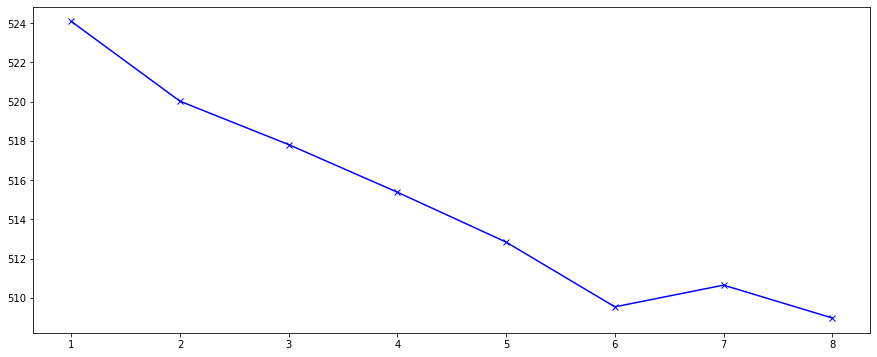

In [31]:
plt.figure(figsize = (15,6))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.show()

We see that there are in total 6 clusters

In [32]:
kmeanModel = KMeans(n_clusters=6, random_state=143)
kmeanModel.fit(u)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=143, tol=0.0001, verbose=0)

In [33]:
df['cluster_id'] = kmeanModel.labels_

In [34]:
df.head()

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count,cluster_id
0,Open-Source Home Automation,https://www.home-assistant.io/,home-assistant.io,868,230,neya,11 days ago,open source home automation that put local con...,122,3
1,"Smart TVs like Samsung, LG and Roku are tracki...",https://www.washingtonpost.com/technology/2019...,washingtonpost.com,481,310,lsh,12 days ago,wrapped in a snuggie i like to binge on rerun ...,2258,3
4,Arrest Of U.S. Citizen For Assisting North Kor...,https://www.justice.gov/usao-sdny/pr/manhattan...,justice.gov,315,284,jmsflknr,11 days ago,geoffrey s berman the united state attorney fo...,893,3
5,"The Siege of Gondor, Part I: Professionals Tal...",https://acoup.blog/2019/05/10/collections-the-...,acoup.blog,404,166,_Microft,11 days ago,a collection of unmitigated pedantry a look at...,4405,3
6,Matrix Calculus for Deep Learning,https://explained.ai/matrix-calculus/index.html,explained.ai,296,47,yarapavan,12 days ago,terence parr and jeremy howard terence parr an...,8422,5


In [35]:
#removing stop words from the text
def remove_stopwords(text):
    words = [word for word in text.split() if word not in stopwords]
    return(words)

In [37]:
#tokeninzing the documets
df['tokenized_text'] = df.body.apply(lambda x: x.split())

In [38]:
df.tokenized_text = df.body.apply(remove_stopwords)

In [39]:
df.head()

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count,cluster_id,tokenized_text
0,Open-Source Home Automation,https://www.home-assistant.io/,home-assistant.io,868,230,neya,11 days ago,open source home automation that put local con...,122,3,"[open, source, home, automation, put, local, c..."
1,"Smart TVs like Samsung, LG and Roku are tracki...",https://www.washingtonpost.com/technology/2019...,washingtonpost.com,481,310,lsh,12 days ago,wrapped in a snuggie i like to binge on rerun ...,2258,3,"[wrapped, snuggie, binge, rerun, golden, girl,..."
4,Arrest Of U.S. Citizen For Assisting North Kor...,https://www.justice.gov/usao-sdny/pr/manhattan...,justice.gov,315,284,jmsflknr,11 days ago,geoffrey s berman the united state attorney fo...,893,3,"[geoffrey, berman, united, state, attorney, so..."
5,"The Siege of Gondor, Part I: Professionals Tal...",https://acoup.blog/2019/05/10/collections-the-...,acoup.blog,404,166,_Microft,11 days ago,a collection of unmitigated pedantry a look at...,4405,3,"[collection, unmitigated, pedantry, look, hist..."
6,Matrix Calculus for Deep Learning,https://explained.ai/matrix-calculus/index.html,explained.ai,296,47,yarapavan,12 days ago,terence parr and jeremy howard terence parr an...,8422,5,"[terence, parr, jeremy, howard, terence, parr,..."


In [40]:
group_text = df.groupby('cluster_id')['tokenized_text']

In [41]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [42]:
from itertools import chain

In [43]:
for num in range(6):
    values, counts = np.unique(list(chain.from_iterable(group_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [44]:
frequent_words_df

,values,counts,cluster_id
0,"[wa, one, time, work, ha, people, year, get, s...","[2601, 784, 761, 634, 634, 562, 550, 481, 477,...",0
1,"[line, scan, cycle, cpu, dli, ha, instruction,...","[192, 121, 119, 116, 103, 99, 94, 86, 86, 86, ...",1
2,"[amazon, aws, wa, ha, ring, service, new, data...","[314, 150, 133, 97, 92, 78, 74, 70, 67, 65, 64...",2
3,"[wa, ha, one, police, time, year, new, problem...","[3656, 1910, 1774, 1761, 1511, 1070, 1044, 102...",3
4,"[github, try, go, download, back, happens, not...","[131, 103, 96, 94, 90, 88, 88, 69, 60, 58, 49,...",4
5,"[version, build, go, time, dep, string, file, ...","[10254, 10212, 10044, 8930, 8069, 6843, 6492, ...",5


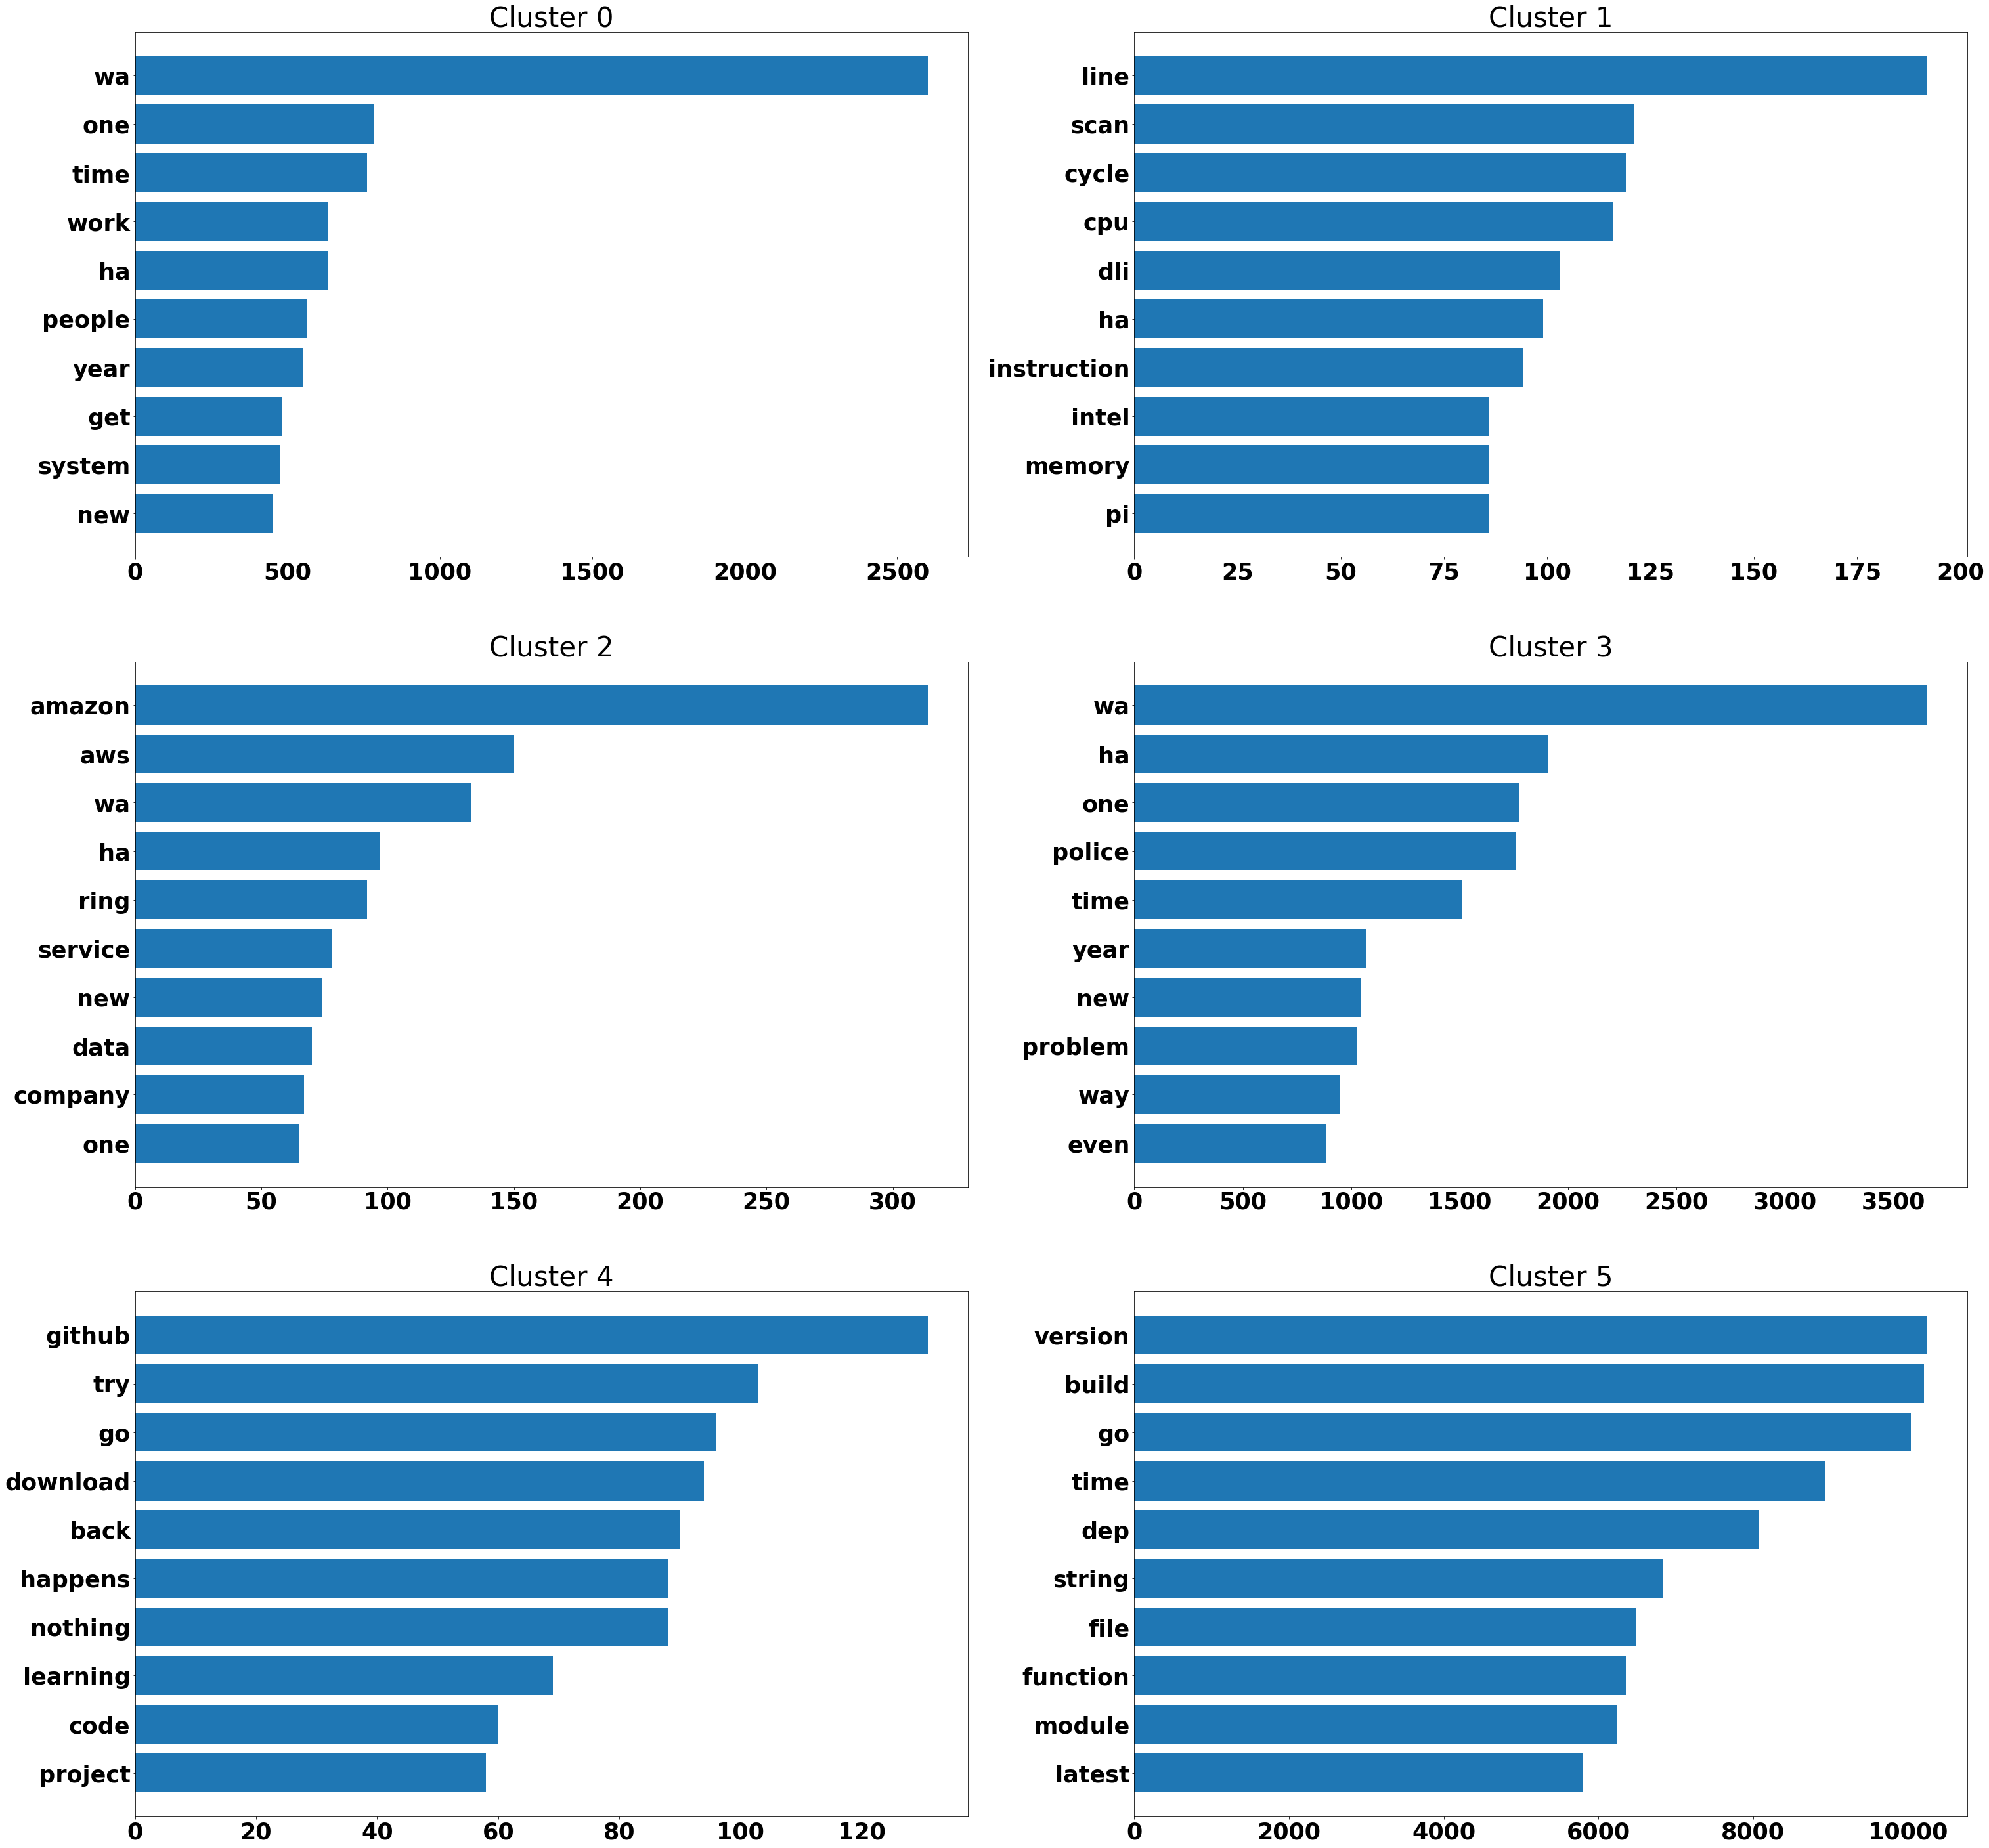

In [45]:
font = {'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

plt.figure(figsize = (50,50))
plt.subplot(3,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:10], frequent_words_df.loc[0,'counts'][:10])
plt.title('Cluster 0')
plt.gca().invert_yaxis()


plt.subplot(3,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:10], frequent_words_df.loc[1,'counts'][:10])
plt.title('Cluster 1')
plt.gca().invert_yaxis()


plt.subplot(3,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:10], frequent_words_df.loc[2,'counts'][:10])
plt.title('Cluster 2')
plt.gca().invert_yaxis()



plt.subplot(3,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:10], frequent_words_df.loc[3,'counts'][:10])
plt.title('Cluster 3')
plt.gca().invert_yaxis()


plt.subplot(3,2,5)
plt.barh(frequent_words_df.loc[4,'values'][:10], frequent_words_df.loc[4,'counts'][:10])
plt.title('Cluster 4')
plt.gca().invert_yaxis()


plt.subplot(3,2,6)
plt.barh(frequent_words_df.loc[5,'values'][:10], frequent_words_df.loc[5,'counts'][:10])
plt.title('Cluster 5')
plt.gca().invert_yaxis()

plt.show()

# Cluster topic segmentation

**Cluster 0** - Talks about cyber security and development in that area.

**Cluster 1** - Talks about the technicalitites of CPU's and oher chips.

**Cluster 2** - Talks about amazon's aws services.

**Cluster 3** - Talks about cyber policing and how it is a new issue altogether.

**Cluster 4** - Talks about error fix for Github.

**Cluster 5** - Talks about machine learing and deep neural networks.

These are the titles of the articles extracted in each of the following clusters.

In [46]:
df[df.cluster_id == 0].head()

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count,cluster_id,tokenized_text
8,The first non-bullshit book about culture I've...,https://zwischenzugs.com/2019/11/27/the-first-...,zwischenzugs.com,358,150,zwischenzug,11 days ago,zwischenzugs i have always been frustrated tha...,1970,0,"[zwischenzugs, always, frustrated, people, oft..."
11,Syntax Highlighting Is Backwards (2018),https://www.benkuhn.net/syntax,benkuhn.net,274,140,pcr910303,11 days ago,most code editor color different piece of your...,1729,0,"[code, editor, color, different, piece, progra..."
14,Michael Apted's “Seven Up” series is reaching ...,https://www.nytimes.com/2019/11/27/magazine/63...,nytimes.com,234,54,pseudolus,11 days ago,in with seven up michael apted stumbled into m...,8635,0,"[seven, michael, apted, stumbled, making, ha, ..."
32,Ralph Merkle on Space Cryonics and Nanotechnology,https://medium.com/discourse/ralph-merkle-on-s...,medium.com,35,4,georgeshi,12 days ago,alcor call them patient and right now over of ...,4887,0,"[alcor, call, patient, right, frozen, soul, wa..."
42,Digital Tools I Wish Existed,https://jborichevskiy.com/posts/digital-tools/,jborichevskiy.com,203,71,jborichevskiy,12 days ago,my digital life in a nutshell i discover relev...,2197,0,"[digital, life, nutshell, discover, relevant, ..."


In [47]:
df[df.cluster_id == 1].head()

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count,cluster_id,tokenized_text
66,AMD's Ryzen Gang Is Currently Clobbering Intel...,https://hothardware.com/news/intel-ryzen-sales...,hothardware.com,37,5,ekoutanov,12 days ago,just a we have seen with monthly rundown from ...,300,1,"[seen, monthly, rundown, german, retailer, min..."
113,Thermal Testing Raspberry Pi 4,https://www.raspberrypi.org/blog/thermal-testi...,raspberrypi.org,121,35,pauloxnet,10 days ago,raspberry pi just got a lot cooler the last fo...,4685,1,"[raspberry, pi, got, lot, cooler, last, four, ..."
118,AMD is dominating Intel in Amazon's best-selli...,https://www.techspot.com/news/82962-amd-domina...,techspot.com,203,91,ekoutanov,11 days ago,in amazon s u chart of it most popular process...,249,1,"[amazon, chart, popular, processor, amd, ryzen..."
193,Quadcopter Programming Part 2: Using the CMSIS...,https://timakro.de/blog/quadcopter-programming...,timakro.de,71,18,timakro,10 days ago,in the last post of the series i explained how...,1721,1,"[last, post, series, explained, get, started, ..."
217,Amazon's cloud unit readies more powerful data...,https://www.reuters.com/article/us-amazon-com-...,reuters.com,64,18,ekoutanov,11 days ago,min read reuters amazon com inc s amzn o cloud...,728,1,"[min, read, reuters, amazon, com, inc, amzn, c..."


In [48]:
df[df.cluster_id == 2].head()

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count,cluster_id,tokenized_text
165,Unbundling AWS,https://www.tclauson.com/2019/09/11/Unbundling...,tclauson.com,331,175,taylorwc,9 days ago,sep over the past year i have spent a lot of t...,818,2,"[sep, past, year, spent, lot, time, digging, c..."
239,Amazon Braket – Get Started with Quantum Compu...,https://aws.amazon.com/blogs/aws/amazon-braket...,amazon.com,451,137,aloknnikhil,8 days ago,nearly a decade ago i wrote about the quantum ...,1706,2,"[nearly, decade, ago, wrote, quantum, compute,..."
308,AWS DeepComposer,https://aws.amazon.com/deepcomposer/,amazon.com,70,13,mychael,8 days ago,aws deepcomposer give developer a creative way...,553,2,"[aws, deepcomposer, give, developer, creative,..."
334,Amazon CodeGuru – Preview,https://aws.amazon.com/codeguru/,amazon.com,427,203,Sheepzez,7 days ago,automate code review identify your most expens...,1451,2,"[automate, code, review, identify, expensive, ..."
355,AWS Is Now Available from a Local Zone in Los ...,https://aws.amazon.com/blogs/aws/aws-now-avail...,amazon.com,124,61,jeffbarr,7 days ago,aws customer are always asking for more featur...,948,2,"[aws, customer, always, asking, feature, bandw..."


In [49]:
df[df.cluster_id == 3].head()

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count,cluster_id,tokenized_text
0,Open-Source Home Automation,https://www.home-assistant.io/,home-assistant.io,868,230,neya,11 days ago,open source home automation that put local con...,122,3,"[open, source, home, automation, put, local, c..."
1,"Smart TVs like Samsung, LG and Roku are tracki...",https://www.washingtonpost.com/technology/2019...,washingtonpost.com,481,310,lsh,12 days ago,wrapped in a snuggie i like to binge on rerun ...,2258,3,"[wrapped, snuggie, binge, rerun, golden, girl,..."
4,Arrest Of U.S. Citizen For Assisting North Kor...,https://www.justice.gov/usao-sdny/pr/manhattan...,justice.gov,315,284,jmsflknr,11 days ago,geoffrey s berman the united state attorney fo...,893,3,"[geoffrey, berman, united, state, attorney, so..."
5,"The Siege of Gondor, Part I: Professionals Tal...",https://acoup.blog/2019/05/10/collections-the-...,acoup.blog,404,166,_Microft,11 days ago,a collection of unmitigated pedantry a look at...,4405,3,"[collection, unmitigated, pedantry, look, hist..."
10,TLA+ model checking made symbolic,https://blog.acolyer.org/2019/11/29/tla-model-...,acolyer.org,197,51,feross,11 days ago,the morning paper a random walk through comput...,1110,3,"[morning, paper, random, walk, computer, scien..."


In [50]:
df[df.cluster_id == 4].head()

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count,cluster_id,tokenized_text
88,Sherlock: Find usernames across social networks,https://github.com/sherlock-project/sherlock,github.com,172,82,Sn0wlizz4rd,10 days ago,github is home to over million developer worki...,512,4,"[github, home, million, developer, working, to..."
91,Fleck: A Lisp that runs wherever Bash is,https://github.com/chr15m/flk/,github.com,148,21,rcarmo,11 days ago,github is home to over million developer worki...,640,4,"[github, home, million, developer, working, to..."
203,Études for Erlang (2014),https://github.com/oreillymedia/etudes-for-erlang,github.com,63,1,ingve,9 days ago,github is home to over million developer worki...,1237,4,"[github, home, million, developer, working, to..."
224,Show HN: Manage Dotfiles with Stow,https://github.com/codejamninja/dotstow,github.com,33,23,codejamninja,10 days ago,github is home to over million developer worki...,536,4,"[github, home, million, developer, working, to..."
307,Tenko: A spec-compliant ES2020 JavaScript pars...,https://github.com/pvdz/tenko,github.com,48,9,wingspan,8 days ago,github is home to over million developer worki...,595,4,"[github, home, million, developer, working, to..."


In [51]:
df[df.cluster_id == 5].head()

,title,link_title,domain,up_points,comment_number,user_name,time,body,word_count,cluster_id,tokenized_text
6,Matrix Calculus for Deep Learning,https://explained.ai/matrix-calculus/index.html,explained.ai,296,47,yarapavan,12 days ago,terence parr and jeremy howard terence parr an...,8422,5,"[terence, parr, jeremy, howard, terence, parr,..."
13,An Overview of Cryptography,https://www.garykessler.net/library/crypto.html,garykessler.net,335,32,miles,12 days ago,a much shorter version of this paper first app...,47956,5,"[much, shorter, version, paper, first, appeare..."
16,Making Git and Jupyter Notebooks play nice,http://timstaley.co.uk/posts/making-git-and-ju...,timstaley.co.uk,168,32,mana99,12 days ago,summary jq rock for speedy json mangling use i...,1823,5,"[summary, jq, rock, speedy, json, mangling, ma..."
30,Show HN: Assembly: A Pythonic Object-Oriented ...,https://mardix.github.io/assembly/,mardix.github.io,66,43,mardix,12 days ago,assembly is a pythonic object oriented mid sta...,497,5,"[assembly, pythonic, object, oriented, mid, st..."
31,Matestack: Rapidly create interactive UIs in Ruby,https://www.matestack.org/,matestack.org,174,39,gremlinsinc,12 days ago,escape the frontend hustle plug into rail exte...,1117,5,"[escape, frontend, hustle, plug, rail, extend,..."
